# GasPedaal Crawler, Scrapper, and Analyser 
(For buying THE car)

automaniac.org
----


Source of information:
http://www.gaspedaal.nl/

http://www.newsday.com/classifieds/cars/consumer-reports-best-and-worst-car-brands-for-reliability-in-2017-include-lexus-toyota-and-buick-1.12508795

Acronyms
CC (Motorinhoud - Engine displacement) engine
PK or KW (Vermogen - horse power)


REMOVE
Nissan Micra
Peugeot 108
Citroen C1
Toyota Aygo


https://www.carwow.co.uk/best/vw-polo-alternatives-0188
http://www.autoexpress.co.uk/car-reviews/14465/toyota-yaris-vs-rivals; 
Volkswagen Polo; 
Ford Fiesta; 
Mazda 2; 
Citroen C4 Cactus; 
Skoda Fabia; 
Peugeot 208; 
Suzuki Swift; 
Opel Corsa; 
Citroen DS3; 
Toyota Yaris;
(NO)Renault Clio;
(NO)Fiat 500; 
(NO)Mini Hatchback; 


https://www.carkeys.co.uk/guides/top-ten-best-family-hatchbacks;
http://www.themotorreport.com.au/60662/the-top-5-small-cars-for-2015-mazda3-golf-308-i30-focus
Audi A3
Ford Focus
Volkswagen Golf
Mazda 3
Seat Leon
Opel Astra
Renault Megane
BMW 1 Series
Skoda Octavia
Peugeot 308
Hyundai i30
Kia Ceed


cars similar to <car>

### 1. Why gaspedaal?
www.gaspedaal.nl : They already crawl a list of sites (autotrader.nl, Autokopen.nl, marktplaats.nl, Speurders.nl, MarktPlaza, Tweedehands.nl, AutoDealers, Tweedehands.net, Nederland Mobiel, AutoWereld.nl, Handelsprijzen, GebruikteAuto.NL, Cartweet, AutoVoorU.nl, Dealer Site, Carhotspot, Autodeals.nl, Nieuweautokopen.nl, OpelOccasions.nl, Vakgarage.nl, ImportWereld, btw-auto.nl, TweedehandsBedrijfsAuto.NL, ZoekJeBedrijfsWagen.nl, Handelsprijzen (Motoren), FinancialLease, ActivLease, PlanetAuto.NL, Auto Financier, CallMimmy, Financiele Lease, Dealer sites Motoren, BikeNet, DasWeltAuto.nl, Audi.nl).

Related Websites: autoscout24.nl; autotrack.nl

### 2. Let's start playing with different requesting URL at glaspedaal.nl

In [8]:
#url='http://www.gaspedaal.nl/zoeken.html?srt=df&p=1'
url ='https://www.gaspedaal.nl/zoeken?page=2&srt=df-a'
# url='http://www.gaspedaal.nl/zoeken.html?crs=Hatchback&srt=df&p=1'
# url="http://www.gaspedaal.nl/zoeken.html?crs=Stationwagon&srt=df&p=1"
# url="http://www.gaspedaal.nl/zoeken.html?merk=&model=Alle+modellen&trfw=&pmin=&pmax=&kmin=&kmax=&bmin=&bmax=&klr%5B%5D=&trns=&crs=21&brnst=&pc=&strl=&srt=df&uz=0&fz=1&zoeksitesoort=autosite&cmin=&cmax=&dr=&vrk=&lftd=&grnt=&csmin=&csmax=&schd="

### 3. Function to get the entire content (in bytes) of a given URL

In [9]:
import cfscrape
from lxml import etree  #http://lxml.de/tutorial.html

from random import randint
from time import sleep

def get_url_content(url):
    """This function returns all the cars in one page"""

    scraper = cfscrape.create_scraper()
    scraped_html=scraper.get(url).content
    
#   sleep(randint(0,maxtime)) #for Gaspedaal there is NO blocking!!! So, no need for this!
    
    return etree.HTML(scraped_html) 

### 4. Testing the get_url_content( ) function

In [10]:
html = get_url_content(url)
print(html)

<Element html at 0x10bdd4a48>


### 5. Showing the content of the URL for determining what do you want to scrape
Note that instead of doing this discovering step here, it is advised to inspect the html element on the browser.

In [32]:
print(etree.tostring(html,encoding='unicode', pretty_print=True, method="html"))

<html lang="en">
<head>

        
                    <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">
        <meta name="viewport" content="width=device-width, initial-scale=1">
        <meta name="csrf-token" content="nhDNouah29Uou1w2bf9i8WwdKj1khh6JMniasfqi">
        <meta name="theme-color" content="#ffffff">
                    <meta name="robots" content="noindex,follow">
                <meta name="viewport" content="width=device-width, initial-scale=1.0">
                    <meta name="apple-itunes-app" content="app-id=1206862492">
                            <meta name="google-play-app" content="app-id=nl.gaspedaal.gaspedaal">
                
                    <link rel="canonical" href="https://www.gaspedaal.nl">
            
                    <title>GasPedaal.nl - Zoek tweedehands auto's in meerdere autosites tegelijk.</title>
        
            
                        <link rel="prev" href="https://www.gaspedaal.nl/zoeken?page=1

### 5.1. As outcome from the previous step, we discovered that: the number total of pages is in the div class='col-xs-12 col-sm-6 hidden-xs'
Although there are all these pages, I don't believe we will be able to retrieve all theses pages! Therefore, we should do not retrieve the max number of pages as static value but dynamic!

In [31]:
totalpages=html.findall(".//span[@class='total_found']")[0].text
print(totalpages)

(399.967)


### 5.2. As another outcome from step 5., we discovered that: each car information is into div(s) class='occasion_block'

In [59]:
a = html.find(".//ul[@class='listing__content']")

In [60]:
a = html.findall(".//li[@class='occasion popup_click_event aec_popup_click']")

In [27]:
carsinapage=html.findall(".//div[@class='occasion']")
print(len(carsinapage))

0


### 6. Function to scrape the information of each car in one page

In [14]:
from datetime import datetime
import time

def get_cars_onepage(html_tree):
    """This function returns all the cars in one page"""
    
    results = []

    for occasion_block in html_tree.findall(".//div[@class='occasion_block']"):
        title=occasion_block.findtext(".//div[@class='occ_cartitle2b']").strip().split(" - ")
        title_car=title[0]
        try: title_extra=title[1]
        except: title_extra= "NA"

        price=int(occasion_block.findtext(".//div[@class='occ_price2b']").replace("€ ", "").replace(".",""))

        bouwjaar_kmstand= occasion_block.findall(".//div[@class='occ_bouwjaar_kmstand2b']")
        try:
            bouwjaar = datetime.strptime(bouwjaar_kmstand[0][0].text.replace("Bouwjaar: ","").strip(),'%m-%Y').date()
        except:
            try:
                bouwjaar = datetime.strptime(bouwjaar_kmstand[0][0].text.replace("Bouwjaar: ","").strip(),'%Y').date()
            except:
                bouwjaar = datetime.strptime('0001-01','%Y-%m').date()
        km = int(bouwjaar_kmstand[0][1].text.replace("Km.stand: ","").replace(" km","").replace(".","").strip())

        #gas type, cc, automatic/manual, type:stationwagon, collor, doors
        extra_info= occasion_block.findtext(".//div[@class='occ_extrainfo2b']").split(",")
        gas_type=cc=gear_type=car_type=car_color=doors = "NA"
        try: 
            gas_type = extra_info[0].strip()
            try: 
                cc = int(extra_info[1].strip().replace(" cc","").replace(".",""))
                try: 
                    gear_type = extra_info[2].strip()
                    try: 
                        car_type = extra_info[3].strip()
                        try: 
                            doors = int(extra_info[5].strip().replace("-deurs.",""))
                            try: 
                                car_color = extra_info[4].strip()
                            except: next
                        except: next
                    except: next
                except: next
            except: next
        except: next
        
        if occasion_block.findtext(".//div[@class='occ_advertiser']") == "":
            dealer = occasion_block.findtext(".//div[@class='occ_advertiser']")
        else:
            dealer ="NA"
            
        dealer_city = occasion_block.findall(".//div[@class='occ_place']")[0][0].text
    
        sources = occasion_block.findtext(".//span[@id='bron']").replace("Bron: ","").strip().replace("Dealer Site, ","")
        
        concat_all=title_car,title_extra,price,bouwjaar,km,gas_type,cc,gear_type,car_type,doors,car_color, dealer, dealer_city,sources
        results.append(concat_all)
        
    return results

### 6.1. Testing the get_cars_onepage( ) (of the first car)
(1) title_car, (2) title_extra, (3) price, (4) bouwjaar, (5) km, 
(6) gas_type, (7) cc, (8) gear_type, (9) car_type, (10) doors, 
(11) car_color, (12) dealer, (13)dealer_city, (14) sources

In [15]:
get_cars_onepage(html)[0]

IndexError: list index out of range

## 7. Automating Crawling and Scraping (all cars in gaspedaal)

### 7.1 Strategy to "bypass" problems or to detect the end of pages (and STOP our script)
This is a variable to check pages without information (not a single car). I expect that when will be consecutive 'problematic pages', then the script reach the max of pages. It is interesting to manually access the page to see if indeed the page is empty.

In [12]:
max_extra_try=5

### 7.2. Collection loop

In [33]:
page=1
all_cars=[]

while True:

#     url="http://www.gaspedaal.nl/zoeken.html?srt=df&p="+str(page)
    url="http://www.gaspedaal.nl/zoeken.html?crs=Hatchback&srt=df&p="+str(page)
    
    html_tree=get_url_content(url)
    #Is there need for adding delaying time? or bot-detection bypassing strategies? NO!
    
    #Stops if the 'N' page has NO 'occasion_block' (i.e., no single car information)
    if not html_tree.findall(".//div[@class='occasion_block']"):
        max_extra_try = max_extra_try - 1
        print("Problematic: page "+str(page))
        if max_extra_try == 0:
            break

    # Retrieving all cars in one page and append/extend the list with all_cars
    all_cars.extend(get_cars_onepage(html_tree))

    page=page+1 

    # For debugging purpose (to see if the script didn't die)
    if (page % 25) == 0:
        print(page)

NameError: name 'max_extra_try' is not defined

### 7.3. Moving the list to a dataframe (for further analysis) 

In [14]:
import pandas as pd
df = pd.DataFrame(all_cars,\
                  columns=["title_car","title_extra","price","bouwjaar","km","gas_type","cc","gear_type","car_type","doors","car_color","dealer","dealer_city","sources"])

### 7.4. Saving the dataframe into a file (to process later) 
The file name will be the date. We intend compare results from different dates for observing when a record disappears (or a car is marked as sold)

In [15]:
import time
df.to_csv(time.strftime("%Y%m%d_gaspedaal.csv"), index=False)

## 8. The analysis

### 8.0. Reading a (previous created) file containing all cars  (previously retrieved)

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('all_cars.csv')

how the data looks like?!

In [17]:
df.head()

,title_car,title_extra,price,bouwjaar,km,gas_type,cc,gear_type,car_type,doors,car_color,dealer,dealer_city,sources
0,Renault Clio,Estate Energy dCi 90 Expression,16700,2016-08-01,495,Diesel,1461.0,Handgeschakeld,Stationwagon,5.0,Grijs,NaN,ENSCHEDE (OV),"AutoWereld.nl, GebruikteAuto.NL"
1,Skoda Fabia,Combi (3) 1.0 110 PK TSI Style 7 Versn. DSG + ...,23850,2017-08-01,500,Benzine,999.0,Automaat,Stationwagon,5.0,Blauw,NaN,BREDA (NB),"AutoWereld.nl, Nederland Mobiel, Handelsprijzen"
2,Renault Mégane,Estate 1.2 TCe GT-Line | Bose Audio | Sport St...,26899,2017-07-01,120,Benzine,1198.0,Handgeschakeld,Stationwagon,5.0,Blauw,NaN,EMMEN (DR),"AutoWereld.nl, Nederland Mobiel, Handelsprijze..."
3,Skoda Fabia,Combi 1.0 TSI Amb. Bns,18950,2017-12-01,501,Benzine,999.0,Handgeschakeld,Stationwagon,5.0,Grijs,NaN,BREDA (NB),"AutoWereld.nl, Nederland Mobiel, Handelsprijzen"
4,Mitsubishi ASX,1.6 117pk ClearTec met AS&amp;G Intense,26770,2017-07-01,501,Benzine,1590.0,Handgeschakeld,Stationwagon,5.0,Zwart,NaN,EMMEN (DR),"AutoWereld.nl, Nederland Mobiel, Handelsprijze..."


### 8.0.A. Libraries

In [18]:
from datetime import datetime
import time

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.patches as mpatches
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
import seaborn
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

# import plotly
# plotly.offline.init_notebook_mode()

### 8.0.B. Functions to convert datatype

In [19]:
def datetimeinvertedstring2datetime(series):
    return pd.to_datetime(series, format='%Y-%m-%d',errors='coerce')

def thousand_euros(x, pos):
    'The two args are the value and tick position'
    return '€%.0f' % x

def k_euros(x, pos):
    'The two args are the value and tick position'
    return '€%1.1fK' % (x*1e-3)

### 8.1. Getting an overall idea about prices, brands, and the 

In [20]:
df = df.sort_values('price', ascending=True)

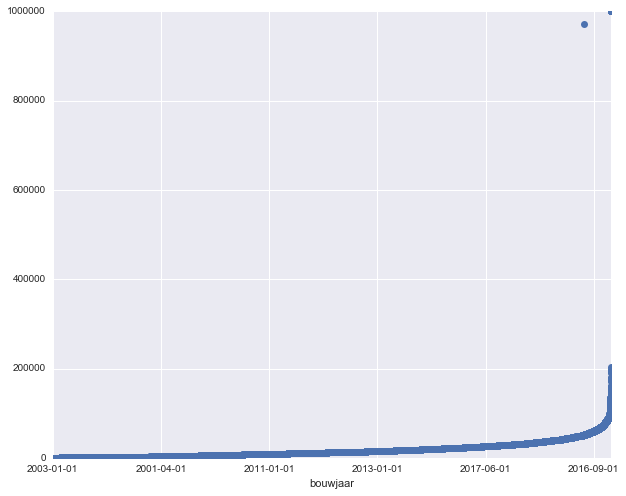

In [21]:
# Plotting!
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=3)

df.plot(ax=ax1, x='bouwjaar', y='price',style='o', label='')

In [ ]:
# For Y-axis, Y-ticks, Y-label
# ax1.set_ylabel('price', fontsize=14)
# ax1.set_ylim(min_price,max_price)
# formatter = FuncFormatter(k_euros)
# ax1.yaxis.set_major_formatter(formatter)

##########
# For X-axis, X-ticks, X-label
# min_price = 0
# max_price = 50000
# ax1.set_xlabel(x_column, fontsize=14)
# ax1.set_xlim(min_price,max_price)
# ax1.xaxis.set_major_locator(dates.YearLocator())
# ax1.xaxis.set_major_formatter(dates.DateFormatter('%b/%Y'))
# plt.xticks(rotation=90, ha='left')

# ##########
# # For Grid
# ax1.grid(b=True, which='major', linestyle='--')

# ##########
# # For Legend
# lines = ax1.get_lines()
# ax1.legend(lines, [l.get_label() for l in lines], loc=2,frameon=True)

## 9.0. What do I want????
1. newer (from 2014 to now)
2. cheaper (<17k)
3. less used (<13,000km/year or 37km/day) https://www.cbs.nl/en-gb/news/2012/10/cars-average-37-kilometres-a-day
4. car brand more expensive than others
5. depreciates less then the other (to do not loose too much money)
6. that is easy to sell (faster to disapear overtime)
7. automatic -> manual 
8. hybrid -> electric -> diesel -> benzine
9. paid Periodic Technical Inspection (APK)
10. from the dealer

- citroen =>peugeot =>renault

REMEMBER: Volkswagen (German) owns: Audi (German), SEAT (Spanish) and Skoda (Czech).

REMEMBER: Toyota owns: Lexus, Scion, Daihatsu and Hino Motors.

**Extra points to ask a mechanic:**
- less problematic car brands?
- cheaper to maintain?

In [22]:
df['bouwjaar']=datetimeinvertedstring2datetime(df['bouwjaar'])

df['delta_time_days']=(max(df['bouwjaar'])-df['bouwjaar']).astype('timedelta64[D]')
df['delta_time_years']=(max(df['bouwjaar'])-df['bouwjaar']).astype('timedelta64[Y]')

df['km_per_day'] = df['km']/df['delta_time_days']
df['km_per_year'] = df['km']/df['delta_time_years']

In [23]:
len(df)

51580

## Restricting a little bit 

In [25]:
df= df[df['bouwjaar']>pd.Timestamp('2016-08-01')]\
    [df['price']<15000]\
    [df['km_per_day']<30]\
    [df['sources'].str.contains("Dealer")]

In [26]:
len(df)

1

## List of brands

In [ ]:
df['title_car'].str.split().str.get(0).value_counts()

## Distribution of prices

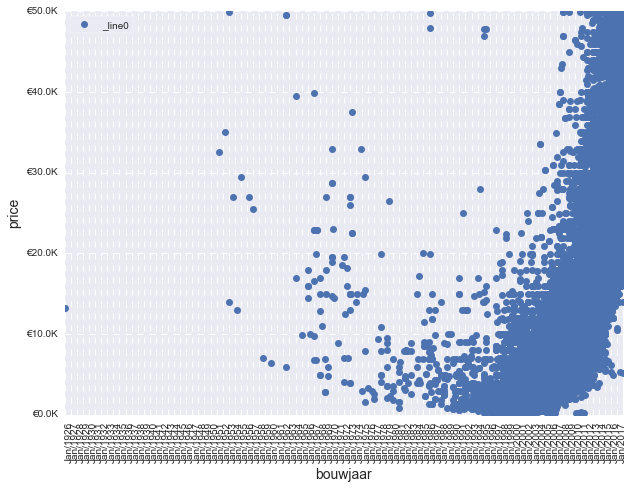

In [28]:
##########
# Defining some restrictions!
# min_year = pd.Timestamp('2004-01-01')
# max_year = pd.Timestamp('2018-01-01')
min_price = 0
max_price = 50000

x_column='bouwjaar'
y_column='price'

##########
# Preliminary processing for ploting TIME-SERIES
# For ANY time-series first you must to convert the date column 
df['bouwjaar']=datetimeinvertedstring2datetime(df['bouwjaar'])
# Then, you must have the dataframe sorted by the date column
df = df.sort_values(x_column, ascending=True)

##########
# Plotting!
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=3)

# should be manually ordered from more expensive to the less
df.plot(ax=ax1, x=x_column, y=y_column,style='o', label='')

##########
# For Y-axis, Y-ticks, Y-label
ax1.set_ylabel(y_column, fontsize=14)
ax1.set_ylim(min_price,max_price)
formatter = FuncFormatter(k_euros)
ax1.yaxis.set_major_formatter(formatter)

##########
# For X-axis, X-ticks, X-label
ax1.set_xlabel(x_column, fontsize=14)
# ax1.set_xlim(min_year,max_year)
ax1.xaxis.set_major_locator(dates.YearLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('%b/%Y'))
plt.xticks(rotation=90, ha='left')

##########
# For Grid
ax1.grid(b=True, which='major', linestyle='--')

##########
# For Legend
lines = ax1.get_lines()
ax1.legend(lines, [l.get_label() for l in lines], loc=2,frameon=True)

##########
# For Plotly (you must to comment the legend lines)
# plotly.offline.iplot_mpl(fig)   

In [ ]:
df.keys()

## Defining the perfect vector  

In [ ]:
price=
bouwjaar=
km=
gas_type= 
cc=
gear_type=
car_type=
delta_time_days=
delta_time_years=
km_per_day
km_per_year

In [ ]:
import scipy.spatial.distance as dist # https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

dist.euclidean([0,0,0],[3,4,5])

In [ ]:
df= df[df['bouwjaar']>pd.Timestamp('2014-01-01')]\
    [df['price']<17000]\
    [df['km_per_day']<37]
#     [df['sources'].str.contains("Dealer")]

In [ ]:
len(df)

In [ ]:
from scipy.spatial.distance import cosine
a = pd.DataFrame({"col1": [158, 25, 180, 152, 96],
                "col2": [1, 1, 1, 1, 1]})

print(cosine(a["col1"], a["col2"]))

In [ ]:
df_renault = df[df['title_car'].str.contains("Renault")]
df_ford = df[df['title_car'].str.contains("Ford")]
df_skoda = df[df['title_car'].str.contains("Skoda")]
df_toyota = df[df['title_car'].str.contains("Toyota")]
df_peugeot = df[df['title_car'].str.contains("Peugeot")]
df_kia = df[df['title_car'].str.contains("Kia")]
df_opel = df[df['title_car'].str.contains("Opel")]
df_volkswagen = df[df['title_car'].str.contains("Volkswagen")]
df_seat = df[df['title_car'].str.contains("Seat")]
df_dacia = df[df['title_car'].str.contains("Dacia")]
df_mini = df[df['title_car'].str.contains("Mini")]
df_hyundai = df[df['title_car'].str.contains("Hyundai")]
df_honda = df[df['title_car'].str.contains("Honda")]
df_mitsubishi = df[df['title_car'].str.contains("Mitsubishi")]
df_lada = df[df['title_car'].str.contains("Lada")]

df_volvo = df[df['title_car'].str.contains("Volvo")]
df_audi = df[df['title_car'].str.contains("Audi")]
df_bmw = df[df['title_car'].str.contains("BMW")]
df_mercedes = df[df['title_car'].str.contains("Mercedes-Benz")]
df_citroen = df[df['title_car'].str.contains("Citroën")]

## Analysis of depreciation (time-series and fit) 

In [ ]:
##########
# Defining some restrictions!
min_year = pd.Timestamp('2000-01-01')
max_year = pd.Timestamp('2018-01-01')
min_price = 0
max_price = 50000

x_column='bouwjaar'
y_column='price'

##########
# Preliminary processing for ploting TIME-SERIES
# For ANY time-series first you must to convert the date column 
df['bouwjaar']=datetimeinvertedstring2datetime(df['bouwjaar'])
# Then, you must have the dataframe sorted by the date column
df = df.sort_values(x_column, ascending=True)

##########
# Plotting!
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=3)

# should be manually ordered from more expensive to the less
df_mercedes.plot(ax=ax1, x=x_column, y=y_column,style='o', label='Mercedes-Benz')
df_bmw.plot(ax=ax1, x=x_column, y=y_column,style='o',label='BMW')
df_volvo.plot(ax=ax1, x=x_column, y=y_column,style='o',label='Volvo')
df_audi.plot(ax=ax1, x=x_column, y=y_column,style='o',label='Audi')

df_renault.plot(ax=ax1, x=x_column, y=y_column,style='*',label='Renault')
df_kia.plot(ax=ax1, x=x_column, y=y_column,style='*',label='Kia')
df_peugeot.plot(ax=ax1, x=x_column, y=y_column,style='D',label='Peugeot')
df_opel.plot(ax=ax1, x=x_column, y=y_column,style='o', label='Opel')
df_ford.plot(ax=ax1, x=x_column, y=y_column,style='o',label='Ford')
df_toyota.plot(ax=ax1, x=x_column, y=y_column,style='o', label='Toyota')
df_seat.plot(ax=ax1, x=x_column, y=y_column,style='o', label='Seat')
df_skoda.plot(ax=ax1, x=x_column, y=y_column,style='d',label='Skoda')

df_volkswagen.plot(ax=ax1, x=x_column, y=y_column,style='v',label='Volkswagen')
df_mini.plot(ax=ax1, x=x_column, y=y_column,style='o', label='Mini')
df_hyundai.plot(ax=ax1, x=x_column, y=y_column,style='o', label='Hyundai')


##########
# For Y-axis, Y-ticks, Y-label
ax1.set_ylabel(y_column, fontsize=14)
ax1.set_ylim(min_price,max_price)
formatter = FuncFormatter(thousand_euros)
ax1.yaxis.set_major_formatter(formatter)

# ##########
# # For X-axis, X-ticks, X-label
# ax1.set_xlabel(x_column, fontsize=14)
# ax1.set_xlim(min_year,max_year)
# ax1.xaxis.set_major_locator(dates.YearLocator())
# ax1.xaxis.set_major_formatter(dates.DateFormatter('%b/%Y'))
# plt.xticks(rotation=90, ha='left')

##########
# For Grid
ax1.grid(b=True, which='major', linestyle='--')

##########
# For Legend
lines = ax1.get_lines()
ax1.legend(lines, [l.get_label() for l in lines], loc=2,frameon=True)

##########
# For Plotly (you must to comment the legend lines)
# plotly.offline.iplot_mpl(fig)   

## Testing fit function (problem when x-axis is timestamp)

In [ ]:
coefs = np.polyfit(x=mdates.date2num(df_renault[x_column].astype(datetime)),\
               y=df_renault[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_renault[x_column].astype(datetime))),\
                  max(mdates.date2num(df_renault[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'*-',label= 'Renault')


########
coefs = np.polyfit(x=mdates.date2num(df_skoda[x_column].astype(datetime)),\
               y=df_skoda[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_skoda[x_column].astype(datetime))),\
                  max(mdates.date2num(df_skoda[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'d-',label='Skoda')

########
coefs = np.polyfit(x=mdates.date2num(df_peugeot[x_column].astype(datetime)),\
               y=df_peugeot[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_peugeot[x_column].astype(datetime))),\
                  max(mdates.date2num(df_peugeot[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'D:',label='Peugeot')

########
coefs = np.polyfit(x=mdates.date2num(df_ford[x_column].astype(datetime)),\
               y=df_ford[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_ford[x_column].astype(datetime))),\
                  max(mdates.date2num(df_ford[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'o-',label='Ford')


########
coefs = np.polyfit(x=mdates.date2num(df_opel[x_column].astype(datetime)),\
               y=df_opel[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_opel[x_column].astype(datetime))),\
                  max(mdates.date2num(df_opel[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'o-',label='Opel')

########
coefs = np.polyfit(x=mdates.date2num(df_hyundai[x_column].astype(datetime)),\
               y=df_hyundai[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_hyundai[x_column].astype(datetime))),\
                  max(mdates.date2num(df_hyundai[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'D-',label='Hyundai')

########
coefs = np.polyfit(x=mdates.date2num(df_volkswagen[x_column].astype(datetime)),\
               y=df_volkswagen[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_volkswagen[x_column].astype(datetime))),\
                  max(mdates.date2num(df_volkswagen[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'v-',label='Volkswagen')

########
coefs = np.polyfit(x=mdates.date2num(df_volvo[x_column].astype(datetime)),\
               y=df_volvo[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_volvo[x_column].astype(datetime))),\
                  max(mdates.date2num(df_volvo[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'o-',label='Volvo')


########

coefs = np.polyfit(x=mdates.date2num(df_audi[x_column].astype(datetime)),\
               y=df_audi[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_audi[x_column].astype(datetime))),\
                  max(mdates.date2num(df_audi[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'--',label='Audi')

########
coefs = np.polyfit(x=mdates.date2num(df_bmw[x_column].astype(datetime)),\
               y=df_bmw[y_column],\
               deg=4)

# equation = 'y={0:.2f} x + {1:.2f} '.format(coefs[0],coefs[1])
ffit = np.poly1d(coefs)
new_x=np.linspace(min(mdates.date2num(df_bmw[x_column].astype(datetime))),\
                  max(mdates.date2num(df_bmw[x_column].astype(datetime))))
new_y=ffit(new_x)
plt.plot(new_x,new_y,'o-',label='BMW')

########
plt.ylim(min_price,max_price)
plt.xlim(pd.Timestamp('2013-01-01'),max_year)

plt.legend(loc=4)

https://stackoverflow.com/questions/37902459/how-do-i-use-seaborns-color-palette-as-a-colormap-in-matplotlib